# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
%pip install --user labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations split-folders

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Harry Parker\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import os
import time
import uuid
import cv2

### 1.2 Annotate images

In [3]:
!labelme

'labelme' is not recognized as an internal or external command,
operable program or batch file.


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import Tensorflow and Dependences

In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [7]:
images = tf.data.Dataset.list_files('images\\data\\footage\\*.jpg')

In [8]:
images.as_numpy_iterator().next()

b'images\\data\\footage\\110660.jpg'

In [9]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [10]:
images = images.map(load_image)

In [11]:
images.as_numpy_iterator().next()

array([[[ 9,  9,  9],
        [12, 12, 12],
        [17, 17, 17],
        ...,
        [30, 30, 30],
        [21, 21, 21],
        [16, 16, 16]],

       [[12, 12, 12],
        [15, 15, 15],
        [19, 19, 19],
        ...,
        [35, 35, 35],
        [26, 26, 26],
        [21, 21, 21]],

       [[ 6,  6,  6],
        [ 9,  9,  9],
        [13, 13, 13],
        ...,
        [33, 33, 33],
        [24, 24, 24],
        [19, 19, 19]],

       ...,

       [[50, 50, 50],
        [56, 56, 56],
        [67, 67, 67],
        ...,
        [59, 59, 59],
        [51, 51, 51],
        [46, 46, 46]],

       [[29, 29, 29],
        [35, 35, 35],
        [44, 44, 44],
        ...,
        [38, 38, 38],
        [31, 31, 31],
        [26, 26, 26]],

       [[13, 13, 13],
        [18, 18, 18],
        [27, 27, 27],
        ...,
        [28, 28, 28],
        [21, 21, 21],
        [17, 17, 17]]], dtype=uint8)

In [12]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### 2.4 View Raw Images with Matplotlib

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

In [19]:
plot_images = image_generator.next()

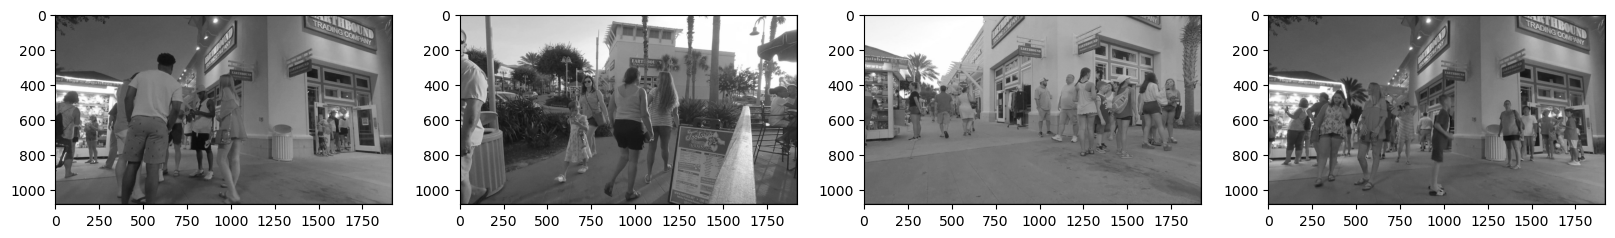

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unargumented Data

### 3.1 Split data into training and testing and valid data

In [22]:
import splitfolders
splitfolders.ratio('./images/data', output="./images/labels", seed=1337, ratio=(.8, 0.1,0.1))

### Move the Matching Labels

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 